# Week07 Performance Evaluation, Encsemble Methods

- **Student ID** : 학번
- **Name** : 이름

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week07_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week07\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Model Evaluation and Hyperparameter Tuning

### Loading Breast Cancer Dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
from sklearn.preprocessing import LabelEncoder

# Get X, y. Encoding class label with scikit-learn
X = df.loc[:, 2:].values # remove 1st column(ID) & 2nd column(target)
y = df.loc[:, 1].values

print(X.shape)
print(y.shape)
print(X[:3])
print(y[:3])

# encode the y label
enc = LabelEncoder()
y = enc.fit_transform(y)

print(y[:3])

(569, 30)
(569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
['M' 'M' 'M']
[1 1 1]


In [3]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size=0.2,
                     stratify=y,
                     random_state=1)
X_train.shape

(455, 30)

### Combining transformers and estimators in a pipeline
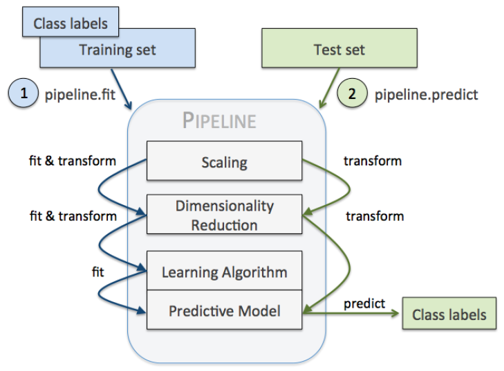

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# make pipeline with StandardScaler, PCA(n_components=2), and LogisticRegression
pipe_lr = None

pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [5]:
# train the model with training data using pipeline
None

print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


### Using k-fold cross validation to assess model performance
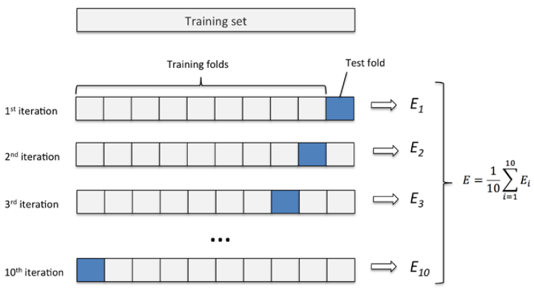

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    
# make indices for stratified k-fold cross validation. k=5 
kfold = None

# train and compute test score for each set
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X[train], y[train])
    score = None
    
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [286 169], Acc: 0.939
Fold:  2, Class dist.: [286 169], Acc: 0.947
Fold:  3, Class dist.: [285 170], Acc: 0.939
Fold:  4, Class dist.: [285 170], Acc: 0.947
Fold:  5, Class dist.: [286 170], Acc: 0.982

CV accuracy: 0.951 +/- 0.016


### Using cross_val_score function

In [7]:
from sklearn.model_selection import cross_val_score

# k-fold cross validation using cross_val_score. use pipeline with entire dataset. k=5
scores = None

print('Scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Scores: [0.93859649 0.94736842 0.93859649 0.94736842 0.98230088]
CV accuracy: 0.951 +/- 0.016


### Checking performance with learning curves
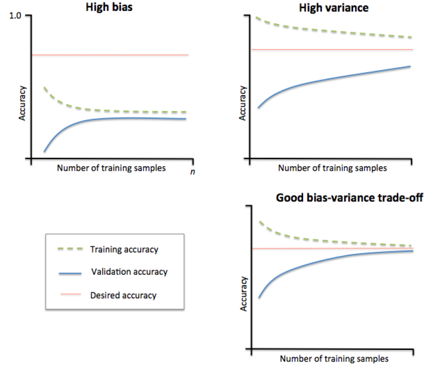

In [8]:
# make pipeline with StandardScaler and LogisticRegression. L2. max_iteration 500
pipe_lr = None


In [9]:
from sklearn.model_selection import learning_curve

# get train test accuracies for training set size 10%, 20%, .. , 100% of entire dataset
# 10-fold cross validation
train_sizes, train_scores, test_scores = None

print(train_sizes)
print(train_scores.shape)

[ 51 102 153 204 256 307 358 409 460 512]
(10, 10)


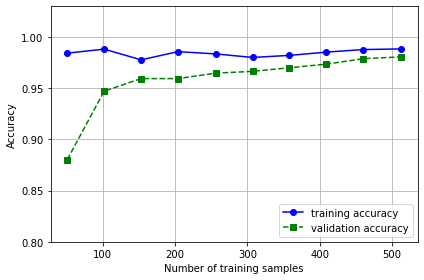

In [10]:
import matplotlib.pyplot as plt

# compute mean scores of each training sizes
train_mean = None
test_mean = None

# plot training sizes vs mean scores
plt.plot(train_sizes, train_mean,
         color='blue', marker='o', 
         label='training accuracy')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--', marker='s', 
         label='validation accuracy')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

plt.show()

### Checking overfitting with validation curves

In [11]:
from sklearn.model_selection import validation_curve
'''
When you select the parameter that you want to control, use
(step name in the Pipeline) + '__' + 'Parameter name'

For example, if you have created pipe_lr like this way :  
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression())
                      
the step name in the Pipeline object is 'logisticregression',
so if you want to select LogisticRegression() class's 'C' parameter, 
then you should use 'logisticregression__C'
'''
# get train test accuracies for regularization parameters C = 0.001, 0.01, .. , 100 
# 10-fold cross validation with training data
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = None

print(param_range)
print(train_scores.shape)

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
(6, 10)


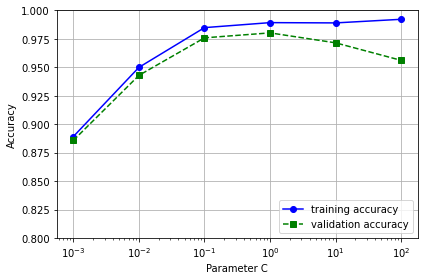

In [12]:
# compute mean scores of each C
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# plot parameters C vs mean scores
plt.plot(None, None, 
         color='blue', marker='o', 
         label='training accuracy')

plt.plot(None, None, 
         color='green', linestyle='--', marker='s',
         label='validation accuracy')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()

plt.show()

### Tuning hyperparameters via grid search

In [13]:
from sklearn.model_selection import GridSearchCV

# standardise training data
stdsc = StandardScaler()
X = stdsc.fit_transform(X)

# grid search of train test accuracies for combinations of C and penalty 
# LogisticRegression(solver='liblinear'). 5-fold cross validation 
param_grid = None

gs = None

gs.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [14]:
# get mean_test_score, std_test_score, params from cv_results_
means =  None
stds = None
params = None

for mean, std, params in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) for %s" % (mean, std * 2, params))

# the best score and parameters
print()
print("Best score:", None)
print("Parameters:", None)

0.924 (+/-0.060) for {'C': 0.01, 'penalty': 'l1'}
0.965 (+/-0.048) for {'C': 0.01, 'penalty': 'l2'}
0.974 (+/-0.031) for {'C': 0.1, 'penalty': 'l1'}
0.982 (+/-0.011) for {'C': 0.1, 'penalty': 'l2'}
0.975 (+/-0.020) for {'C': 1.0, 'penalty': 'l1'}
0.979 (+/-0.014) for {'C': 1.0, 'penalty': 'l2'}
0.963 (+/-0.034) for {'C': 10.0, 'penalty': 'l1'}
0.970 (+/-0.028) for {'C': 10.0, 'penalty': 'l2'}
0.958 (+/-0.037) for {'C': 100.0, 'penalty': 'l1'}
0.963 (+/-0.037) for {'C': 100.0, 'penalty': 'l2'}

Best score: 0.982425089271852
Parameters: {'C': 0.1, 'penalty': 'l2'}


In [15]:
# fit using the best model
clf = None
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.956


### Confusion matrix
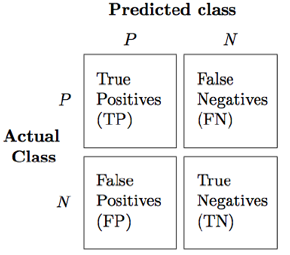

In [16]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix using true y and predicted y 
y_pred = clf.predict(X_test)
confmat = None
print(confmat)

[[70  2]
 [ 3 39]]


### Precision, Recall, and F1
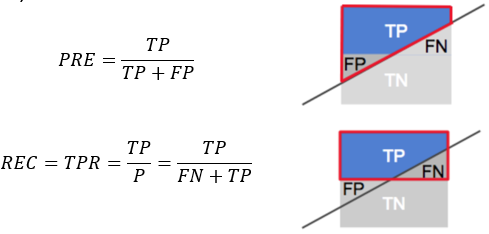

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# compute the Precision, Recall, and F1 score 
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % None)

Precision: 0.951
Recall: 0.929
F1: 0.940


### ROC (Receiver Operating Characteristic) 

In [18]:
# make pipeline of StandardScaler, PCA(n_components=2), and LogisticRegression. L2 with C=0.1
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1, 
                                           C=0.1))

In [19]:
from sklearn.metrics import roc_curve, auc

# use features 4, 5
X_train2 = X_train[:, [4, 5]]
X_test2 = X_test[:, [4, 5]]

# get prediction probability of class 1
pipe_lr.fit(X_train2, y_train)
probas = None

probas[:,1]

array([0.53282813, 0.15817061, 0.51812577, 0.62892811, 0.41243482,
       0.43835836, 0.85533439, 0.34034951, 0.30733992, 0.08722417,
       0.13427872, 0.12640791, 0.95258984, 0.24971451, 0.66494577,
       0.50358049, 0.41915744, 0.07711583, 0.35712582, 0.31808809,
       0.26497807, 0.13998129, 0.12122886, 0.22064399, 0.85111068,
       0.30019008, 0.16914113, 0.51529561, 0.11526452, 0.16904096,
       0.14380837, 0.12175567, 0.1401703 , 0.22201786, 0.1010705 ,
       0.14245774, 0.12708304, 0.22968424, 0.19157186, 0.72612174,
       0.51402239, 0.45798558, 0.19332654, 0.53958541, 0.16523808,
       0.07525642, 0.81934357, 0.21744893, 0.34394163, 0.403577  ,
       0.22400003, 0.56529082, 0.23914355, 0.09923984, 0.22327367,
       0.40496427, 0.52473711, 0.37463394, 0.31377216, 0.77230777,
       0.10076891, 0.51846562, 0.51972376, 0.04040745, 0.08909317,
       0.99068404, 0.42437102, 0.10225292, 0.66976056, 0.16887582,
       0.93883695, 0.11107202, 0.45303914, 0.15075154, 0.58909

In [20]:
# true classes
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

### Compute FPR, TPR

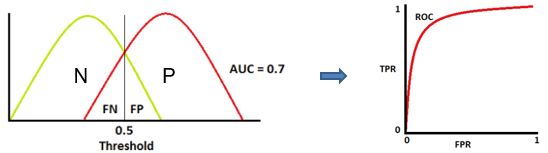

In [21]:
# compute FPR, TPR for different thresholds. use roc_curve()
fpr, tpr, thresholds = None
fpr

array([0.        , 0.        , 0.        , 0.01388889, 0.01388889,
       0.02777778, 0.02777778, 0.04166667, 0.04166667, 0.05555556,
       0.05555556, 0.06944444, 0.06944444, 0.09722222, 0.09722222,
       0.125     , 0.125     , 0.13888889, 0.13888889, 0.22222222,
       0.22222222, 0.29166667, 0.29166667, 0.30555556, 0.30555556,
       0.34722222, 0.34722222, 0.375     , 0.375     , 0.58333333,
       0.58333333, 0.69444444, 0.69444444, 1.        ])

In [22]:
thresholds

array([1.99068404, 0.99068404, 0.95258984, 0.93883695, 0.81934357,
       0.77230777, 0.69412104, 0.68751501, 0.68048153, 0.66976056,
       0.54246593, 0.53958541, 0.51846562, 0.51529561, 0.50358049,
       0.45798558, 0.43835836, 0.42968304, 0.42437102, 0.39805059,
       0.34034951, 0.30019008, 0.26497807, 0.24971451, 0.23914355,
       0.22829722, 0.22400003, 0.22201786, 0.21744893, 0.15203789,
       0.15075154, 0.1302865 , 0.12708304, 0.04040745])

### Plot ROC Curve

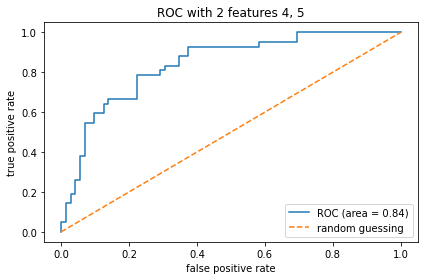

In [23]:
# compute area under ROC curve. use auc() 
roc_auc = None

# plot ROC curve with FPR and TPR
plt.plot(None, None, 
         label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         label='random guessing')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('ROC with 2 features 4, 5')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

---

# 2. Ensemble Methods

### Loading Wine Dataset

In [24]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# use class 2 and 3 only
df_wine = df_wine[df_wine['Class label'] != 1]

# use features 'Alcohol', 'Malic acid'
X = df_wine[['Alcohol', 'Malic acid']].values
y = df_wine['Class label'].values

print(X.shape)
print(X[:5])
print(y.shape)
print(y[:5])

(119, 2)
[[12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]]
(119,)
[2 2 2 2 2]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    stratify=y)
X_train.shape

(95, 2)

### Bagging
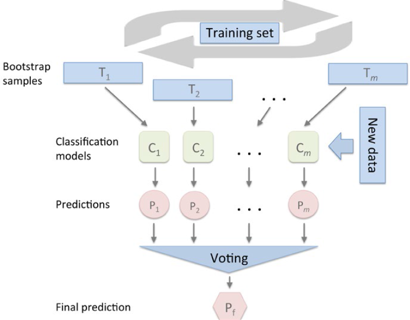

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# decision tree with entropy and max_depth 4
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4,
                              random_state=1)
tree.fit(X_train, y_train)

# bag of 100 trees. number of samples 50%. number of features 100% 
bag = None

bag.fit(X_train, y_train)

print('Tree training/test accuracy: %.2f / %.2f' 
      % (tree.score(X_train, y_train), tree.score(X_test, y_test)))
print('Bag training/test accuracy: %.2f / %.2f' 
      % (bag.score(X_train, y_train), bag.score(X_test, y_test)))

Tree training/test accuracy: 0.92 / 0.79
Bag training/test accuracy: 0.92 / 0.88


### Decision boundary of base classifier

In [27]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

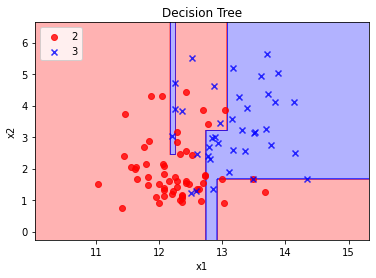

In [28]:
# decision boundary of the tree 
plot_decision_regions(X_train, y_train, classifier=None)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Tree")
plt.legend(loc='upper left')
plt.show()

### Decision boundary of bagging

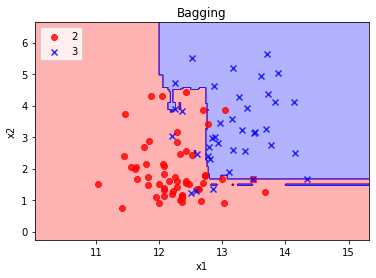

In [29]:
# decision boundary of the bag of trees 
plot_decision_regions(X_train, y_train, classifier=None)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Bagging")
plt.legend(loc='upper left')
plt.show()

### Boosting
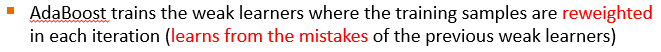
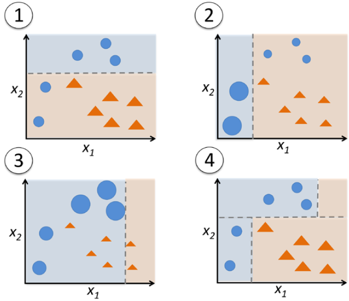

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# weak learner - decision tree with entropy and max_depth 1
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)
tree.fit(X_train, y_train)

# boosting classifier 100 times. learning rate 0.1
ada = None

ada.fit(X_train, y_train)

print('Tree training/test accuracy: %.2f / %.2f' 
      % (tree.score(X_train, y_train), tree.score(X_test, y_test)))
print('AdaBoost training/test accuracy: %.2f / %.2f' 
      % (ada.score(X_train, y_train), ada.score(X_test, y_test)))

Tree training/test accuracy: 0.85 / 0.75
AdaBoost training/test accuracy: 0.93 / 0.88


### Decision boundary of base classifier

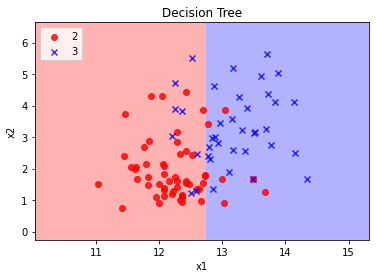

In [31]:
# decision boundary of the tree 
plot_decision_regions(X_train, y_train, classifier=None)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Tree")
plt.legend(loc='upper left')
plt.show()

### Decision boundary of boosting

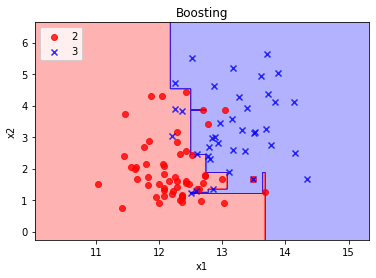

In [32]:
# decision boundary of the boosting classifier
plot_decision_regions(X_train, y_train, classifier=None)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Boosting")
plt.legend(loc='upper left')
plt.show()

---

# Quiz 1 : Performance Evaluation

### Fine-tune your Logistic Regression model you build last week quiz

- On the F1-Score,
    1. Do K-fold Cross validation
    2. Plot Learning curve
    3. Plot Validation curve
    4. Find optimal hyperparameter using Grid Search
- https://www.kaggle.com/c/titanic/data

### Load Dataset

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("titanic.csv")

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 0. Make Pipeline 'preprocessor'
- This is the code that compresses the entire process into a pipeline.
- If you think this code complicated, then you can do preprocessing like the way we did last week, without using pipeline

- **Categorical feature** :
    - **Nominal feature** : Survived(target), Sex, Embarked 
    - **Ordinal feature** : Pclass(already mapped(integer vlaue))
    - Drop : PassengerId, Name, Ticket, Cabin
    - Impute the missing values with most frequent value
- **Numeric feature**  
    - Age, SibSp, Parch, Fare
    - Impute the missing values with mean value
    - Demensionality Reduction py PCA (4 -> 2)
- https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = ['Age', 'SibSp', 'Parch', 'Fare' ]
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    PCA(n_components=2)
)

categorical_features = ['Embarked', 'Sex']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first')
) # Drop the first dummy feature : Embarked_C, Sex_female

# When make pipeline with the mixed types data,
# you can use different pipeline to each column(feature) using 'ColumnTransformer'
# with list of tuples ('name of the process', transformer(pipeline), column list)
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pass','passthrough',["Pclass"]) # Specify what column you want to passthrough
    ]
)

In [37]:
# Check if preprocessor works well - array
preprocessor.fit_transform(df)

array([[ 0.02836786, -0.83610876,  0.        ,  1.        ,  1.        ,
         3.        ],
       [-0.00430552,  0.93616257,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.64140443, -0.55845763,  0.        ,  1.        ,  0.        ,
         3.        ],
       ...,
       [ 1.45807695,  0.01764833,  0.        ,  1.        ,  0.        ,
         3.        ],
       [-0.50016895, -0.23582134,  0.        ,  0.        ,  1.        ,
         1.        ],
       [-0.80840809, -0.24736715,  1.        ,  0.        ,  1.        ,
         3.        ]])

In [38]:
# Check if preprocessor works well - dataframe
pd.DataFrame(preprocessor.fit_transform(df),
             columns=["PC1", "PC2",
                      "Sex", 
                      "Embarked_Q", "Embarked_S", 
                      "Pclass"])

,PC1,PC2,Sex,Embarked_Q,Embarked_S,Pclass
0,0.028368,-0.836109,0.0,1.0,1.0,3.0
1,-0.004306,0.936163,0.0,0.0,0.0,1.0
2,-0.641404,-0.558458,0.0,1.0,0.0,3.0
3,-0.037700,0.513581,0.0,1.0,0.0,1.0
4,-0.889431,-0.086158,0.0,1.0,1.0,3.0
...,...,...,...,...,...,...
886,-0.636582,-0.432009,0.0,1.0,1.0,2.0
887,-0.306638,-0.601744,0.0,1.0,0.0,1.0
888,1.458077,0.017648,0.0,1.0,0.0,3.0
889,-0.500169,-0.235821,0.0,0.0,1.0,1.0


### Split the dataset into train set and test set

In [39]:
## Split Dataset into train and validation set. Here, X, y are dataframes
from sklearn.model_selection import train_test_split
X = df.iloc[:, 2:]
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size=0.3, random_state=0, stratify=y)
# If you do not use Pipeline, then run the bellow code,
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)
# X = preprocessor.transform(X)
# y = y.values

### Model : Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# make pipeline with preprocessor, and LogisticRegression
pipe_lr = None

# train the model with training data using pipeline
None

print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.806


### Evaluation : F1-Score

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# get the F-1 scores. use f1_score()
print("Train F1 : %.3f" % None)
print("Test F1 : %.3f" % None)

Train F1 : 0.716
Test F1 : 0.737


### 1. K-fold Cross validation
- K-fold cross validation to assess model performance

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# make scorer to compute F1 score in cross_val_score function
scorer = make_scorer(f1_score, pos_label=1)

# cross validation using cross_val_score. use scoring=scorer
scores = None

print('Scores: %s' % scores)
print('CV F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Scores: [0.73381295 0.72992701 0.70588235 0.68292683 0.73282443]
CV F1: 0.717 +/- 0.020


### 2. Plot Learning Curve

In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

# make scorer to compute F1 score in cross_val_score function
scorer = make_scorer(f1_score, pos_label=1)

# F1 score for different training set size. use scoring=scorer
train_sizes, train_scores, test_scores = None

print(train_sizes)
print(train_scores.shape)

[ 56 112 168 224 280 336 392 448 504 560]
(10, 10)


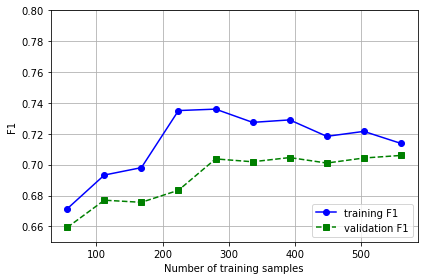

In [47]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(None)

plt.plot(None)

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.ylim([0.65, 0.8])
plt.tight_layout()

plt.show()

### 3. Plot Validation Curve

In [48]:
from sklearn.model_selection import validation_curve

# F1 score for different regularization parameters. use scoring=scorer
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = None

print(param_range)
print(train_scores.shape)

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
(7, 10)


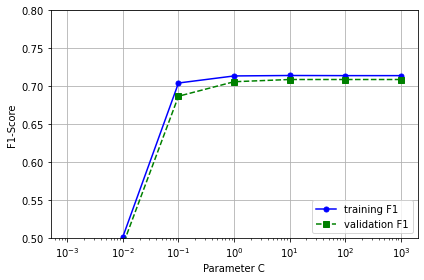

In [49]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(None)

plt.plot(None)

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('F1-Score')
plt.ylim([0.5, 0.8])
plt.tight_layout()

plt.show()

### 4. Find optimal hyperparameter using Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

# training with various parameter combinations. use scoring=scorer
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = None

gs = None

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7089113690721959
{'logisticregression__C': 10.0}


In [51]:
# get the best model
None

# fit with the best model
None

print("Train F1 : %.3f" % f1_score(y_train, clf_best.predict(X_train)))
print("Test F1 : %.3f" % f1_score(y_test, clf_best.predict(X_test)))

Train F1 : 0.716
Test F1 : 0.737


---

# Quiz 2 : Ensemble Methods

### Apply bagging and boosting to the decision tree model and compare the accuracies
- Use the preprocessed data from Quiz 1
- https://www.kaggle.com/c/titanic/data

### 1. Bagging classifier using decision tree 

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 1) Base Classifier : Decision Tree
# make pipeline with preprocessor, and DecisionTreeClassifier
tree = make_pipeline(None)

tree.fit(X_train, y_train)

# 2) Bagging Classifier with Decision Tree 
base_clf = DecisionTreeClassifier(random_state=1)
# make pipeline with preprocessor, and BaggingClassifier
bag = make_pipeline(None)

bag = bag.fit(X_train, y_train)

In [53]:
# compare the performances 
print(None)
print(None)

Tree training/test accuracy: 0.99 / 0.78
Bag training/test accuracy: 0.99 / 0.81


### 2. AdaBoost Classifier using decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# 1) week learner - Decision Tree with max_depth=1
# make pipeline with preprocessor, and DecisionTreeClassifier
tree = make_pipeline(None)

tree.fit(X_train, y_train)

# 2) AdaBoost Classifier with week learner 
base_clf = DecisionTreeClassifier(max_depth=1, random_state=1)
# make pipeline with preprocessor, and AdaBoostClassifier
ada = make_pipeline(None)

ada = ada.fit(X_train, y_train)

In [55]:
print(None)
print(None)

Tree training/test accuracy: 0.78 / 0.79
AdaBoost training/test accuracy: 0.82 / 0.82
